In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import os

In [2]:
#ROOT_DIR = os.path.abspath('./train')
ROOT_DIR = os.path.abspath(r"G:\datasets\sim_train_320x256")
image_directory = os.path.join(ROOT_DIR, "color/")
annotation_file = os.path.join(ROOT_DIR, "instances_hands_full.json")
print(ROOT_DIR)
print(image_directory)
print(annotation_file)

G:\datasets\sim_train_320x256
G:\datasets\sim_train_320x256\color/
G:\datasets\sim_train_320x256\instances_hands_full.json


In [3]:
example_coco = COCO(annotation_file)

loading annotations into memory...
Done (t=0.84s)
creating index...
index created!


In [4]:
categories = example_coco.loadCats(example_coco.getCatIds())
category_names = [category['name'] for category in categories]
print('Custom COCO categories: \n{}\n'.format(' '.join(category_names)))

category_names = set([category['supercategory'] for category in categories])
print('Custom COCO supercategories: \n{}'.format(' '.join(category_names)))

Custom COCO categories: 
hand

Custom COCO supercategories: 
arm-regions


0

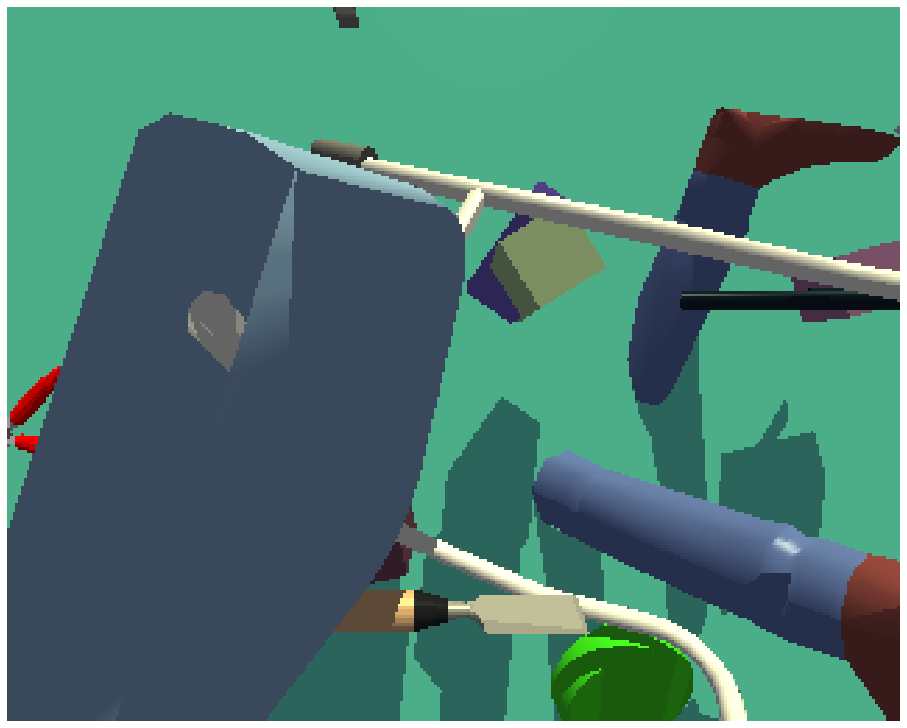

In [17]:
category_ids = example_coco.getCatIds(catNms=['hand'])
image_ids = example_coco.getImgIds(catIds=category_ids)
image_data = example_coco.loadImgs(image_ids[np.random.randint(0, len(image_ids))])[0]

# load and display instance annotations
image = io.imread(image_directory + image_data['file_name'])
plt.imshow(image); plt.axis('off')
pylab.rcParams['figure.figsize'] = (16.0, 20.0)
annotation_ids = example_coco.getAnnIds(imgIds=image_data['id'], catIds=category_ids, iscrowd=None)
annotations = example_coco.loadAnns(annotation_ids)
example_coco.showAnns(annotations)